In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as s
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.stats.anova import anova_lm

In [2]:
data=pd.read_csv('D:/research_paper/heart_2020_cleaned.csv/heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
data['Diabetic'] = data.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' or x == 'Yes (during pregnancy)' else x)
data.Diabetic.value_counts()

No     278993
Yes     40802
Name: Diabetic, dtype: int64

In [5]:
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

data[column_yesno]=data[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [6]:
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [7]:
column=['Sex']
columns=['GenHealth']
data[column] = data[column].apply(lambda x: x.map({'Female':0,'Male':1}))
data[columns] = data[columns].apply(lambda x: x.map({'Poor':0,'Fair':1,'Good':2,'Very good':3,'Excellent':4}))
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,3,8.0,0,0,0


In [8]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [9]:
data1=data.drop(['Race'],axis=1)
data1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,0,1,3,8.0,0,0,0


In [10]:
data1['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [11]:
age=['AgeCategory']
data1[age] = data1[age].apply(lambda x: x.map({'18-24':18,'25-29':25,'30-34':30,'35-39':35,'40-44':40,'45-49':45,'50-54':50,'55-59':55,'60-64':60,'65-69':65,'70-74':70,'75-79':75,'80 or older':80}))
data1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,0,1,3,8.0,0,0,0


In [12]:
data1.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

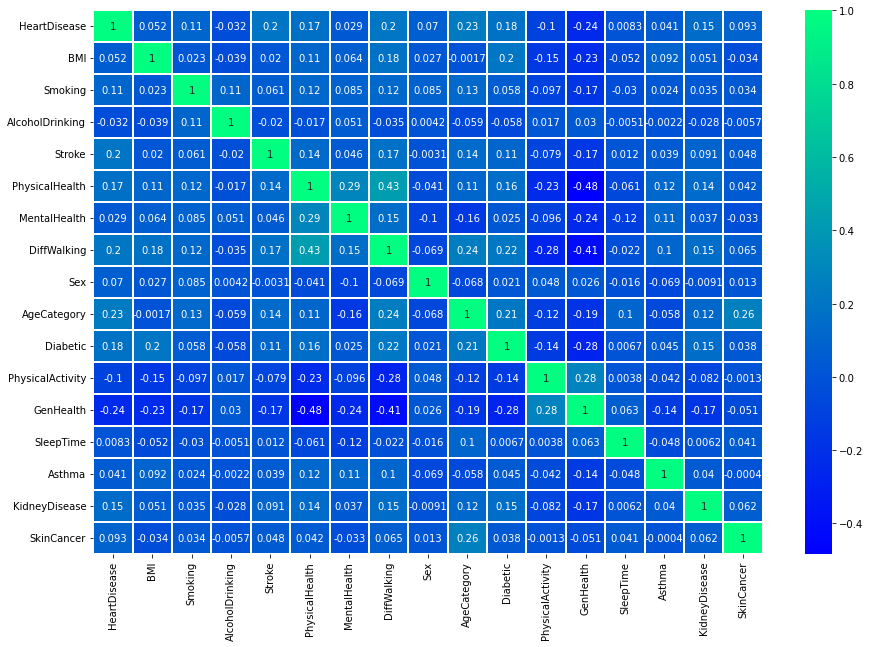

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Diabetic          319795 non-null  int64  
 11  PhysicalActivity  319795 non-null  int64  
 12  GenHealth         319795 non-null  int64  
 13  SleepTime         319795 non-null  float64
 14  Asthma            319795 non-null  int64  
 15  KidneyDisease     319795 non-null  int64  
 16  SkinCancer        31

In [15]:
reg1=ols(formula='HeartDisease ~ Stroke+Smoking+BMI+AlcoholDrinking+Sex+AgeCategory+KidneyDisease+SkinCancer+PhysicalHealth+DiffWalking+MentalHealth+Diabetic+GenHealth',data=data1)
Fit1=reg1.fit()
Fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4006.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:44:26   Log-Likelihood:                -22288.
No. Observations:              319795   AIC:                         4.460e+04
Df Residuals:                  319781   BIC:                         4.475e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0070      0.003      2.054      0.040       0.000       0.014
Stroke              0.1834      0.002     74.025      0.000       0.178       0.188
Smoking             0.0208      0.001     21.521      0.000       0.019       0.023
BMI                -0.0006   7.58e-05     -7.738      0.000      -0.001      -0.000
AlcoholDrinking    -0.0151      0.002     -8.193      0.000      -0.019      -0.011
Sex                 0.0474      0.001     50.681      0.000       0.046       0.049
AgeCategory         0.0022   2.87e-05     77.851      0.000       0.002       0.002
KidneyDisease       0.1015      0.003     40.475      0.000       0.097       0.106
SkinCancer          0.0275      0.002     16.765      0.000       0.024       0.031
PhysicalHealth      0.0012   7.03e-05     16.663      0.000       0.001       0.001
DiffWalking         0.0446      0.002     28.363      0.000       0.042       0.048
MentalHealth     5.644e-05   6.29e-05      0.898      0.369   -6.68e-05       0.000
Diabetic            0.0629      0.001     42.377      0.000       0.060       0.066
GenHealth          -0.0322      0.001    -58.594      0.000      -0.033      -0.031
==============================================================================
Omnibus:                   151263.842   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           694564.016
Skew:                           2.380   Prob(JB):                         0.00
Kurtosis:                       8.428   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x1=data1['GenHealth']

x3=data1['DiffWalking']
x4=data1['Diabetic']
data1['G2']=x1*x1
data1['M2']=x4*x3
data1['G&D']=x1*x4
x6=data1['BMI']
xb=data1['AgeCategory']
data1['b']=xb*x4
#data1['G&D']=x1*x3


In [17]:
x=data1[['Stroke','Smoking','BMI','AlcoholDrinking','Sex','AgeCategory','KidneyDisease','SkinCancer','PhysicalHealth','MentalHealth','DiffWalking','Diabetic','GenHealth','G2','b','G&D']]
y=data1['HeartDisease']
x2=s.add_constant(x)
model=s.OLS(y,x2).fit()
model.summary()

C:\Users\Mahendran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     3407.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:44:35   Log-Likelihood:                -21244.
No. Observations:              319795   AIC:                         4.252e+04
Df Residuals:                  319778   BIC:                         4.270e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0600      0.004     14.848      0.000       0.052       0.068
Stroke              0.1780      0.002     72.018      0.000       0.173       0.183
Smoking             0.0219      0.001     22.729      0.000       0.020       0.024
BMI                -0.0002    7.6e-05     -3.035      0.002      -0.000   -8.17e-05
AlcoholDrinking    -0.0148      0.002     -8.057      0.000      -0.018      -0.011
Sex                 0.0464      0.001     49.741      0.000       0.045       0.048
AgeCategory         0.0021   2.94e-05     72.469      0.000       0.002       0.002
KidneyDisease       0.0933      0.003     37.201      0.000       0.088       0.098
SkinCancer          0.0270      0.002     16.545      0.000       0.024       0.030
PhysicalHealth      0.0004   7.38e-05      5.738      0.000       0.000       0.001
MentalHealth     2.875e-05   6.27e-05      0.458      0.647   -9.42e-05       0.000
DiffWalking         0.0358      0.002     22.607      0.000       0.033       0.039
Diabetic           -0.0752      0.007    -10.344      0.000      -0.089      -0.061
GenHealth          -0.0867      0.002    -41.127      0.000      -0.091      -0.083
G2                  0.0112      0.000     28.413      0.000       0.010       0.012
b                   0.0029      0.000     27.145      0.000       0.003       0.003
G&D                -0.0208      0.001    -14.587      0.000      -0.024      -0.018
==============================================================================
Omnibus:                   152091.048   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           718880.510
Skew:                           2.380   Prob(JB):                         0.00
Kurtosis:                       8.594   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
e=model.resid_pearson
e

array([-0.32962827, -0.94610529, -1.10033564, ..., -0.08410091,
        0.08816319, -0.35227866])

In [19]:
yhat=model.predict(x2)
yhat

0         0.085241
1         0.244661
2         0.284545
3         0.112635
4         0.028333
            ...   
319790    0.288782
319791    0.036979
319792    0.021748
319793   -0.022799
319794    0.091099
Length: 319795, dtype: float64

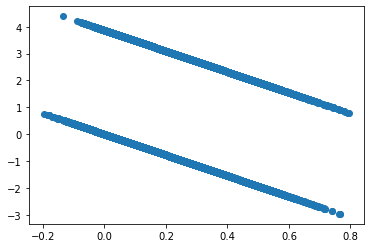

In [20]:
plt.scatter(yhat,e)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1.drop(['HeartDisease'],axis=1),data1['HeartDisease'],test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((239846, 20), (79949, 20))

In [22]:
from sklearn.feature_selection import chi2
y=data1['HeartDisease']
f_p=chi2(data1.drop(['HeartDisease'],axis=1),y)
f_d=pd.DataFrame(f_p).T

In [23]:
f_d.index=x_train.columns
#f_d.sort_values(ascending=False)
f_d

,0,1
BMI,1224.020726,3.672553e-268
Smoking,2181.953023,0.000000e+00
AlcoholDrinking,306.693270,1.147059e-68
Stroke,11922.577647,0.000000e+00
PhysicalHealth,174751.529924,0.000000e+00
MentalHealth,4243.691008,0.000000e+00
DiffWalking,11154.414931,0.000000e+00
Sex,823.195671,4.886453e-181
AgeCategory,107471.789123,0.000000e+00
Diabetic,9350.519077,0.000000e+00


In [24]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.00351572, 0.00724443, 0.00030722, 0.01180133, 0.01257826,
       0.00216725, 0.01360997, 0.00156058, 0.03168485, 0.01067954,
       0.0037741 , 0.02925941, 0.00179365, 0.00176879, 0.00946167,
       0.00265282, 0.02884979, 0.01144945, 0.00534192, 0.01229594])

In [25]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

AgeCategory         0.031685
GenHealth           0.029259
G2                  0.028850
DiffWalking         0.013610
PhysicalHealth      0.012578
b                   0.012296
Stroke              0.011801
M2                  0.011449
Diabetic            0.010680
KidneyDisease       0.009462
Smoking             0.007244
G&D                 0.005342
PhysicalActivity    0.003774
BMI                 0.003516
SkinCancer          0.002653
MentalHealth        0.002167
SleepTime           0.001794
Asthma              0.001769
Sex                 0.001561
AlcoholDrinking     0.000307
dtype: float64

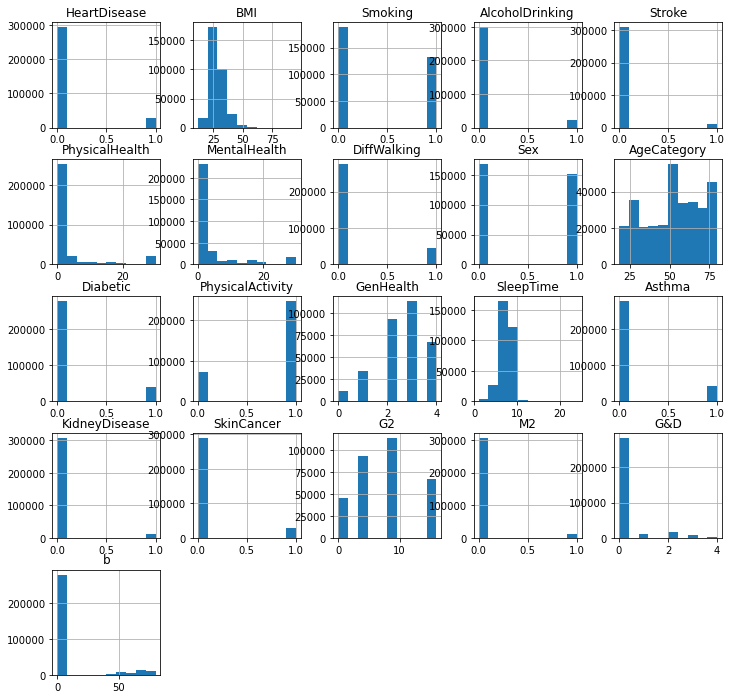

In [18]:
data1.hist(figsize=(12,12))
plt.savefig('featuresplot')

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Testing Accuracy for Logistic Regression: 0.9158213361017649
Testing Sensitivity for Logistic Regression: 0.9218192212411865
Testing Specificity for Logistic Regression: 0.5332252836304701
Testing Precision for Logistic Regression: 0.9921243693342631


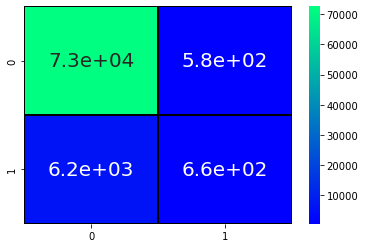

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.fit_transform(x_train)
lr=LogisticRegression(solver='saga')
model1=lr.fit(x_train.drop(['Asthma','SleepTime'],axis=1),y_train)#,'P2','P&D'
prediction1=model1.predict(x_test.drop(['Asthma','SleepTime'],axis=1))
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [44]:
print(classification_report(y_test,prediction1))#Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73137
           1       0.53      0.10      0.16      6812

    accuracy                           0.92     79949
   macro avg       0.73      0.54      0.56     79949
weighted avg       0.89      0.92      0.89     79949



In [28]:
from sklearn.metrics import confusion_matrix

Testing Accuracy for Random Forest: 0.9163841949242643
Testing Sensitivity for Random Forest: 0.9187271581600505
Testing Specificity for Random Forest: 0.6060100166944908
Testing Precision for Random Forest: 0.9967731791022328


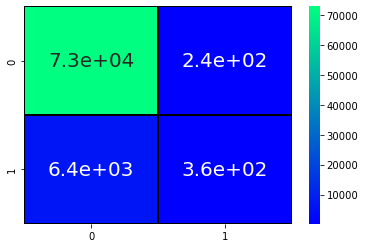

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=10,min_samples_split=8)
model3 = rfc.fit(x_train.drop(['Asthma','SleepTime'],axis=1), y_train)#,'P2','P&D','G&D'
prediction3 = model3.predict(x_test.drop(['Asthma','SleepTime'],axis=1))
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [42]:
print(classification_report(y_test,prediction3))#RandomForest

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73137
           1       0.61      0.05      0.10      6812

    accuracy                           0.92     79949
   macro avg       0.76      0.53      0.53     79949
weighted avg       0.89      0.92      0.88     79949



In [25]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
model3 = rfc.fit(x_train, y_train)
prediction3 = model3.predict(x_test)


In [26]:
from sklearn.preprocessing import Binarizer
bin=Binarizer(threshold=0.5)
prediction=bin.fit_transform(prediction3.reshape(1,-1))
prediction=prediction.astype('int64')
print(prediction[0:10])

[[0 0 0 ... 0 0 0]]


In [27]:
np.array(np.unique(y_test,return_counts=True)).T


array([[    0, 73137],
       [    1,  6812]], dtype=int64)

In [28]:
pf=pd.DataFrame(prediction)
pf.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
79944    int64
79945    int64
79946    int64
79947    int64
79948    int64
Length: 79949, dtype: object

In [29]:
np.array(np.unique(prediction,return_counts=True)).T

array([[    0, 77393],
       [    1,  2556]], dtype=int64)

In [30]:
prediction=prediction.reshape(-1,1)

prediction.shape,y_test.shape

((79949, 1), (79949,))

Testing Accuracy for Random Forest: 0.9058649889304432
Testing Sensitivity for Random Forest: 0.9238820048324784
Testing Specificity for Random Forest: 0.36032863849765256
Testing Precision for Random Forest: 0.9776446942040281


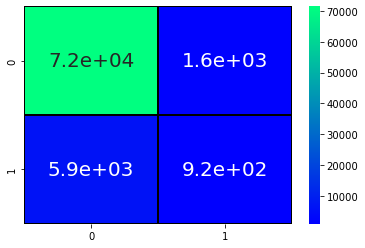

In [31]:

cm3=confusion_matrix(y_test, prediction)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [400]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [400]}


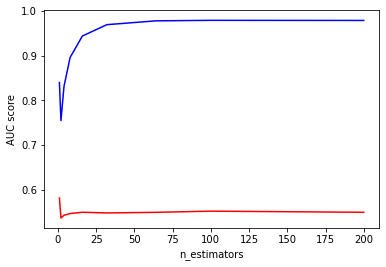

In [43]:
from sklearn.metrics import roc_curve,auc
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1= plt.plot(n_estimators, train_results,'b', label="Train AUC")
line2= plt.plot(n_estimators, test_results,'r', label="Test AUC")
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

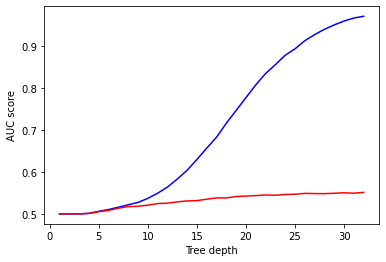

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1= plt.plot(max_depths, train_results,'b', label="Train AUC")
line2= plt.plot(max_depths, test_results,'r', label="Test AUC")
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

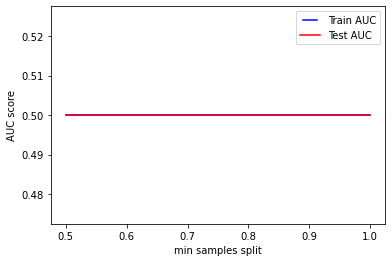

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
min_samples_splits = np.linspace(0.5, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

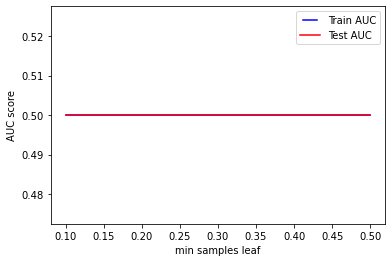

In [27]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(x_train, y_train)
   train_pred = rf.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction1,y_test),#accuracy_score(prediction3,y_test)

(0.9158213361017649,)

from sklearn.svm import SVC
svm=SVC()#C=12,kernel='linear'
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

from sklearn.svm import SVC

svm=SVC(C=12,kernel='linear')

model4=svm.fit(x_train,y_train)

prediction4=model4.predict(x_test)

cm4= confusion_matrix(y_test,prediction4)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction4=knn.predict(x_test)


Testing Accuracy for knn 0.9059150208257765
Testing Sensitivity for knn 0.9207977938818701
Testing Specificity for knn 0.32106854838709675
Testing Precision for knn 0.9815825095368965


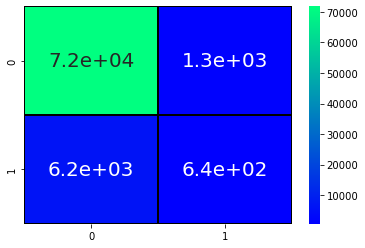

In [39]:
cm4=confusion_matrix(y_test, prediction4)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for knn',(TP/(TP+FN)))
print('Testing Specificity for knn',(TN/(TN+FP)))
print('Testing Precision for knn',(TP/(TP+FP)))

In [41]:
print(classification_report(y_test,prediction4))#KNN

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     73137
           1       0.32      0.09      0.14      6812

    accuracy                           0.91     79949
   macro avg       0.62      0.54      0.55     79949
weighted avg       0.87      0.91      0.88     79949



k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)
print(grid_search.best_params_)

In [69]:
from scipy import stats
final_pred = np.array([])
for i in range(0,79949):
    final_pred = np.append(final_pred, stats.mode([prediction1[i], prediction3[i], prediction4[i]]))
    
print(i)

79948


Testing Accuracy for Random Forest: 0.9062890879071397
Testing Sensitivity for Random Forest: 0.9135955169628432
Testing Specificity for Random Forest: 0.09776536312849161
Testing Precision for Random Forest: 0.9911545623836127


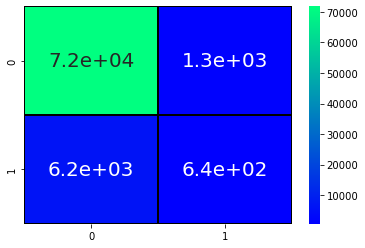

In [70]:
cm5=confusion_matrix(y_test, final_pred[79949:159898])
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm5[0][0]
TN=cm5[1][1]
FN=cm5[1][0]
FP=cm5[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [71]:
final_pred.shape

(159898,)

In [72]:
y_test.shape

(79949,)

In [73]:
x_test.shape

(79949, 20)

In [74]:
79949*2

159898

In [75]:
pred=np.round((prediction1+prediction3+prediction4)/3)
pred.shape

(79949,)

Testing Accuracy for Random Forest: 0.9161715593690978
Testing Sensitivity for Random Forest: 0.9192805301356894
Testing Specificity for Random Forest: 0.5759668508287292
Testing Precision for Random Forest: 0.9958023982389215


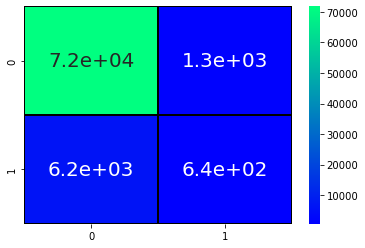

In [76]:
cm6=confusion_matrix(y_test, pred)
sns.heatmap(cm4, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm6[0][0]
TN=cm6[1][1]
FN=cm6[1][0]
FP=cm6[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Average voting',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Average voting',(TP/(TP+FN)))
print('Testing Specificity for Average voting',(TN/(TN+FP)))
print('Testing Precision for Average voting',(TP/(TP+FP)))

In [37]:

print(classification_report(y_test,pred))

NameError: name 'pred' is not defined

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
knn=KNeighborsClassifier()
model1 = LogisticRegression(solver='saga')
model2=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=10,min_samples_split=8)
#model2 = RandomForestClassifier()
model = VotingClassifier(estimators=[('lr', model1),('rf',model2),('kn',knn),('nb',nb)])#, voting='hard'
model.fit(x_train.drop(['Asthma','SleepTime'],axis=1),y_train)#,'P2','P&D'
model.score(x_test.drop(['Asthma','SleepTime'],axis=1),y_test)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9163216550550977

In [32]:
predict_vc=model.predict(x_test.drop(['Asthma','SleepTime'],axis=1))
cm7=confusion_matrix(y_test, predict_vc)


NameError: name 'cm6' is not defined

Testing Accuracy for votng classifier: 0.9163216550550977
Testing Sensitivity for votng classifier: 0.919356263805617
Testing Specificity for votng classifier: 0.5842541436464088
Testing Precision for votng classifier: 0.9958844360583562


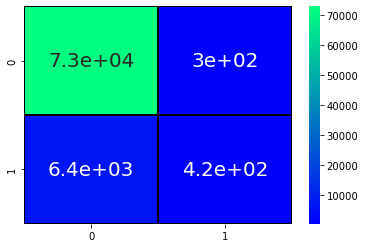

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
knn=KNeighborsClassifier()
model1 = LogisticRegression(solver='saga')
model2=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=10,min_samples_split=8)
#model2 = RandomForestClassifier()
model = VotingClassifier(estimators=[('lr', model1),('rf',model2),('kn',knn),('nb',nb)])#, voting='hard'
model.fit(x_train.drop(['Asthma','SleepTime'],axis=1),y_train)#,'P2','P&D'
model.score(x_test.drop(['Asthma','SleepTime'],axis=1),y_test)sns.heatmap(cm7, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm7[0][0]
TN=cm7[1][1]
FN=cm7[1][0]
FP=cm7[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for votng classifier:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for votng classifier:',(TP/(TP+FN)))
print('Testing Specificity for votng classifier:',(TN/(TN+FP)))
print('Testing Precision for votng classifier:',(TP/(TP+FP)))

In [36]:
from sklearn.metrics import classification_report#Ensemble Learning Technique
print(classification_report(y_test,predict_vc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73137
           1       0.58      0.06      0.11      6812

    accuracy                           0.92     79949
   macro avg       0.75      0.53      0.53     79949
weighted avg       0.89      0.92      0.88     79949



In [46]:
y_pred_proba=model.predict_proba(x_test.drop(['Asthma','SleepTime'],axis=1))[:,1]
y_pred_proba.reshape(1,-1)

AttributeError: predict_proba is not available when voting='hard'

In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
knn=KNeighborsClassifier()
model1 = LogisticRegression(solver='saga')
model2=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=10,min_samples_split=8)
#model2 = RandomForestClassifier()
model = VotingClassifier(estimators=[('lr', model1),('rf',model2),('kn',knn),('nb',nb)],voting='soft')#, voting='hard'
model.fit(x_train.drop(['Asthma','SleepTime'],axis=1),y_train)#,'P2','P&D'
model.score(x_test.drop(['Asthma','SleepTime'],axis=1),y_test)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9103053196412713

In [49]:
predict_vc1=model.predict(x_test.drop(['Asthma','SleepTime'],axis=1))
cm7=confusion_matrix(y_test, predict_vc1)


Testing Accuracy for votng classifier: 0.9103053196412713
Testing Sensitivity for votng classifier: 0.9296115872561024
Testing Specificity for votng classifier: 0.4434645669291339
Testing Precision for votng classifier: 0.9758398621764633


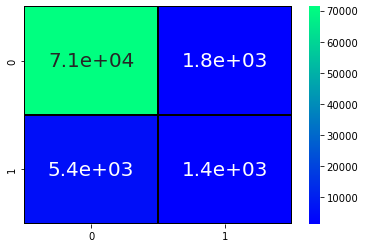

In [50]:
sns.heatmap(cm7, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm7[0][0]
TN=cm7[1][1]
FN=cm7[1][0]
FP=cm7[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for votng classifier:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for votng classifier:',(TP/(TP+FN)))
print('Testing Specificity for votng classifier:',(TN/(TN+FP)))
print('Testing Precision for votng classifier:',(TP/(TP+FP)))

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_vc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73137
           1       0.58      0.06      0.11      6812

    accuracy                           0.92     79949
   macro avg       0.75      0.53      0.53     79949
weighted avg       0.89      0.92      0.88     79949



In [52]:
y_pred_proba=model.predict_proba(x_test.drop(['Asthma','SleepTime'],axis=1))[:,1]
y_pred_proba.reshape(1,-1)

array([[0.20605325, 0.00522701, 0.01367094, ..., 0.09192471, 0.00738355,
        0.00292152]])

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
vot_roc_auc=roc_auc_score(y_test,predict_vc)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)

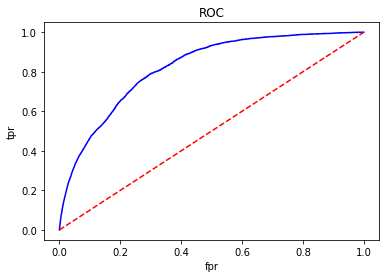

0.8208485890719442

In [58]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.show()
roc_auc

Testing Accuracy for Random Forest: 0.9153460330960987
Testing Sensitivity for Random Forest: 0.9160491969759657
Testing Specificity for Random Forest: 0.6170212765957447
Testing Precision for Random Forest: 0.9990155461667829


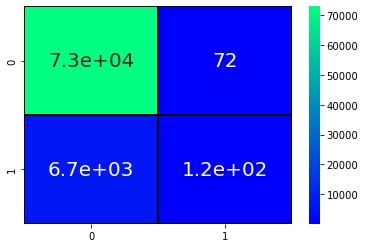

In [88]:
accuracy_score(y_test,predict_vc)
cm6=confusion_matrix(y_test,predict_vc)
sns.heatmap(cm6, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm6[0][0]
TN=cm6[1][1]
FN=cm6[1][0]
FP=cm6[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for votng classifier:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for votng classifier:',(TP/(TP+FN)))
print('Testing Specificity for votng classifier:',(TN/(TN+FP)))
print('Testing Precision for votng classifier:',(TP/(TP+FP)))

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_vc))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     73137
           1       0.58      0.06      0.11      6812

    accuracy                           0.92     79949
   macro avg       0.75      0.53      0.53     79949
weighted avg       0.89      0.92      0.88     79949



In [ ]:
from sklearn.model_selection import cross_val_score
res=cross_val_score(model,data1.drop(['HeartDisease'],axis=1),data1['HeartDisease'],cv=5)
res

In [ ]:
res.mean(),res.std()

Testing Accuracy for Random Forest: 0.8171584385045466
Testing Sensitivity for Random Forest: 0.950916179938048
Testing Specificity for Random Forest: 0.24083665338645419
Testing Precision for Random Forest: 0.8436769350670659


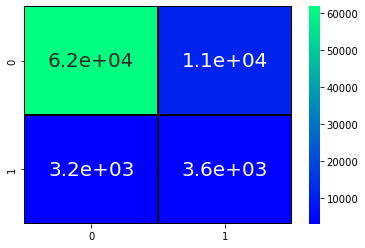

In [78]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_predict=nb.predict(x_test)
cm6=confusion_matrix(y_test, y_predict)
sns.heatmap(cm6, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm6[0][0]
TN=cm6[1][1]
FN=cm6[1][0]
FP=cm6[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for GaussianNB:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for GaussianNB:',(TP/(TP+FN)))
print('Testing Specificity for GaussianNB:',(TN/(TN+FP)))
print('Testing Precision for GaussianNB:',(TP/(TP+FP)))

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
model = BaggingClassifier(RandomForestClassifier(random_state=1),n_estimators=100,max_samples=.5,max_features=9)
model.fit(x_train, y_train)
predict=model.predict(x_test)


In [80]:
model.score(x_test,y_test),accuracy_score(y_test,predict)

(0.9155711766250985, 0.9155711766250985)

In [81]:
from sklearn.ensemble import BaggingRegressor
model1= BaggingRegressor(LogisticRegression(solver='saga'),n_estimators=50,max_samples=.7,max_features=8)
model.fit(x_train, y_train)
predict1=model.predict(x_test)
model.score(x_test,y_test),accuracy_score(y_test,predict1)

(0.9154961287820986, 0.9154961287820986)

In [82]:
from sklearn.ensemble import BaggingRegressor
model1= BaggingRegressor(GaussianNB(),n_estimators=100,max_samples=.8,max_features=9)
model.fit(x_train, y_train)
predict1=model.predict(x_test)
model.score(x_test,y_test),accuracy_score(y_test,predict1)

(0.9153460330960987, 0.9153460330960987)

In [70]:
model = BaggingClassifier(RandomForestClassifier(random_state=1),n_estimators=100,max_samples=.5,max_features=9)
model1= BaggingRegressor(LogisticRegression(solver='saga'),n_estimators=50,max_samples=.7,max_features=8)
model2= BaggingRegressor(GaussianNB(),n_estimators=100,max_samples=.8,max_features=9)
model1._estimator_type = "classifier"
model2._estimator_type = "classifier"
model = VotingClassifier(estimators=[('lr', model1),('nb',model2),('rf',model)])#, voting='hard'
model.fit(x_train.drop(['Asthma','SleepTime'],axis=1),y_train)#,'P2','P&D'
model.score(x_test.drop(['Asthma','SleepTime'],axis=1),y_test)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter wa

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [77]:
prediction=model.predict(x_test.drop(['Asthma','SleepTime'],axis=1).astype(float))
accuracy_score(y_test,prediction)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [73]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79949 entries, 126167 to 280360
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               79949 non-null  float64
 1   Smoking           79949 non-null  int64  
 2   AlcoholDrinking   79949 non-null  int64  
 3   Stroke            79949 non-null  int64  
 4   PhysicalHealth    79949 non-null  float64
 5   MentalHealth      79949 non-null  float64
 6   DiffWalking       79949 non-null  int64  
 7   Sex               79949 non-null  int64  
 8   AgeCategory       79949 non-null  int64  
 9   Diabetic          79949 non-null  int64  
 10  PhysicalActivity  79949 non-null  int64  
 11  GenHealth         79949 non-null  int64  
 12  SleepTime         79949 non-null  float64
 13  Asthma            79949 non-null  int64  
 14  KidneyDisease     79949 non-null  int64  
 15  SkinCancer        79949 non-null  int64  
 16  G2                79949 non-null  

In [84]:
from sklearn.metrics import classification_report

